In [1]:
import Pkg

# retrieve dependencies
Pkg.add("Plots")
Pkg.add("LaTeXStrings")
Pkg.add("DataFrames")
Pkg.add("CSV")

   Resolving package versions...
  No Changes to `C:\Users\maste\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\maste\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\maste\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\maste\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\maste\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\maste\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\maste\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\maste\.julia\environments\v1.9\Manifest.toml`


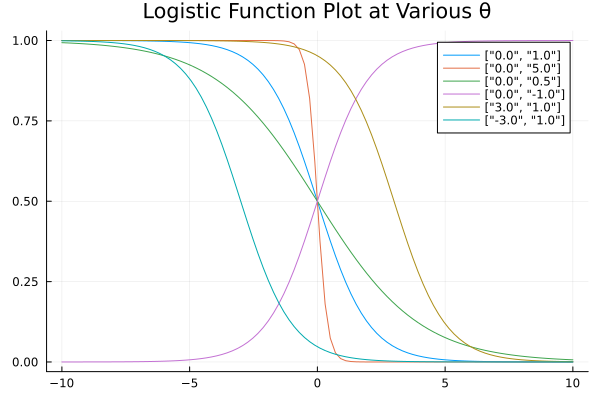

In [1]:
# part a
using Plots

x = range(-10, 10, length = 100)

# given parameter settings
params = [[0, 1], [0, 5], [0, 0.5], [0, -1], [3, 1], [-3, 1]]

# for each run, we want a new plot
Plots.CURRENT_PLOT.nullableplot = nothing

# for each set of theta_0 and theta, we want a seperate plot
for param in params
    # creates an empty vector
    p = zeros(0)

    for x = range(-10, 10, length = 100)
        # appends calculated value of the logistic function given parameters to p
        append!(p, 1 / (1 + exp(-param[1] + param[2] * x)))

      end
    # plots all plots for each set of params
    Plots.plot!(x, p, label = param)

end

# other plot details
title!("Logistic Function Plot at Various θ")

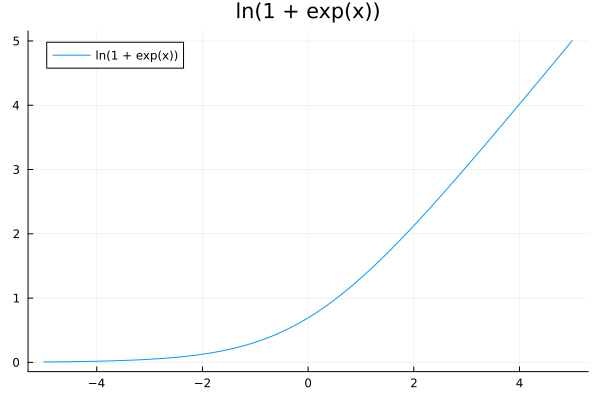

In [2]:
# part c
using Plots

x = range(-5, 5, length = 100)

# specified equation
y = log.(1 .+ exp.(x))

# plot details
Plots.plot(x, y, label = "ln(1 + exp(x))")
title!("ln(1 + exp(x))")

In [3]:
using DataFrames, CSV
data = CSV.read("titanic_data.csv", DataFrame)

Row,Passenger,Age,Fare,Sex,SibSp,ParCh,PClass,Survived
,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,1,22.0,7.25,0,1,0,3,0
2,2,38.0,71.2833,1,1,0,1,1
3,3,26.0,7.925,1,0,0,3,1
4,4,35.0,53.1,1,1,0,1,1
5,5,35.0,8.05,0,0,0,3,0
6,6,28.0,8.4583,0,0,0,3,0
7,7,54.0,51.8625,0,0,0,1,0
8,8,2.0,21.075,0,3,1,3,0
9,9,27.0,11.1333,1,0,2,3,1


In [4]:
# number 3
# part a
using LinearAlgebra

# first 600 data points
N = 600

# each individual columns
passenger = data[!, 1]
age = data[!, 2]
fare = data[!, 3]
sex = data[!, 4]
sibsp = data[!, 5]
parch = data[!, 6]
pclass = data[!, 7]
survived = data[!, 8]

# the length of x will be the relevant columns, which is from 2 to 7; y is the last column
x_length = ncol(data) - 2

# givens
theta_0 = 0
theta = ones(1, x_length)

# combination of theta_0 and theta
given_w = zeros(0)
append!(given_w, theta_0)

for value in theta
    append!(given_w, value)

end

In [5]:
# f is the function to the right of the summation sign shown in (1)
function eval_f(theta_0, theta, x, y)
    f = log(1 + exp(theta_0 + dot(theta, x))) - y * (theta_0 + dot(theta, x))
    return f

end

# dtheta_0 is df/dtheta_0
function eval_dtheta_0(theta_0, theta, x, y)
    dtheta_0 = exp(theta_0 + dot(theta, x)) / (exp(theta_0 + dot(theta, x)) + 1) - y
    return dtheta_0

end

# dtheta  is df/dtheta
function eval_dtheta(theta_0, theta, x, y)
    dtheta = (exp(theta_0 + dot(theta, x)) / (exp(theta_0 + dot(theta, x)) + 1)) * x - y * x
    return dtheta

end

# calculates f for all the data and returns f(w)
function f_data(w, data, N)
    
    theta_0 = w[1]
    theta = w[2:length(w)]

    f = 0
    # loops over N data points to calculate the sum of each relevant value
    for i = range(1, N)
        # the definitions for x and y
        x = [age[i], fare[i], sex[i], sibsp[i], parch[i], pclass[i]]
        y = survived[i]

        # summation for f
        f += eval_f(theta_0, theta, x, y)

    end

    # normalizing final sum
    f = f / N
    return f

end

# calculates df for all the data and returns df(w)
function df_data(w, data, N)
    
    theta_0 = w[1]
    theta = w[2:length(w)]
    
    dtheta_0 = 0
    dtheta = zeros(x_length)
    # loops over N data points to calculate the sum of each relevant value
    for i = range(1, N)
        # the definitions for x and y
        x = [age[i], fare[i], sex[i], sibsp[i], parch[i], pclass[i]]
        y = survived[i]

        # summations for df
        dtheta_0 += eval_dtheta_0(theta_0, theta, x, y)
        dtheta += eval_dtheta(theta_0, theta, x, y)

    end

    # normalizing final sums
    dtheta_0 = dtheta_0 / N
    dtheta = dtheta / N

    # combining dtheta_0 and dtheta to get w
    df = zeros(0)
    append!(df, dtheta_0)

    for value in dtheta
        append!(df, value)

    end

    return df

end

println("When w = (0, 1, ..., 1) and N = 600, f(w) = ", f_data(given_w, data, N))
println("When w = (0, 1, ..., 1) and N = 600, the gradient of f(w) = ", df_data(given_w, data, N))

When w = (0, 1, ..., 1) and N = 600, f(w) = 35.00358950007347
When w = (0, 1, ..., 1) and N = 600, the gradient of f(w) = [0.6066666665931815, 18.271666666533562, 14.576922832540104, 0.09333333326041875, 0.3483333333110199, 0.19333333326012986, 1.5199999997795566]


In [6]:
# part b
# givens
N = 600
EPOCHS = 1000
BATCH_SIZE = 100
INITIAL_STEP_SIZE = 0.01

# initialization
w_0 = hcat(theta_0, theta)
f_0 = f_data(w_0, data, N)
alpha = INITIAL_STEP_SIZE
E = EPOCHS
B = BATCH_SIZE

# test data
data_test = data[N + 1: nrow(data), :]

Row,Passenger,Age,Fare,Sex,SibSp,ParCh,PClass,Survived
,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,601,24.0,27.0,1,2,1,2,1
2,602,28.0,7.8958,0,0,0,3,0
3,603,28.0,42.4,0,0,0,1,0
4,604,44.0,8.05,0,0,0,3,0
5,605,35.0,26.55,0,0,0,1,1
6,606,36.0,15.55,0,1,0,3,0
7,607,30.0,7.8958,0,0,0,3,0
8,608,27.0,30.5,0,0,0,1,1
9,609,22.0,41.5792,1,1,2,2,1


In [8]:
# model as described in algorithm 1
function SGD(E, N, B, alpha, w_k, f_e_prev)
    
    # defined for plotting purposes
    f_k_all = zeros(0)
    f_e_all = zeros(0)

    for e = range(1, E)

        # empty f_k to append to
        f_k = zeros(0)

        for k = range((e - 1) * N / B, e * N / B - 1)

            # append to both since f_k is necessary for f_e below and f_k_all for plotting purposes
            append!(f_k, f_data(w_k, data, N))
            append!(f_k_all, f_data(w_k, data, N))

            # this way it starts at 1:100, 101:200, etc.
            start_index = floor(Int, (k - N / B * (e - 1)) * B + 1)
            end_index = start_index + (B - 1)

            # choose minibatch
            S_k = data[start_index: end_index, :]

            # compute gradient (estimate)
            df_k = df_data(w_k, S_k, nrow(S_k))

            # update solution
            w_k = w_k - alpha * df_k'

        end

        # compute average objective function value and append to f_e_all for plotting purposes
        f_e = B / N * sum(f_k)
        append!(f_e_all, f_e)

        # updates step size
        if f_e >= f_e_prev
            alpha /= 2

        end

        # sets current f_e to the previous, since a new epoch will start
        f_e_prev = f_e

    end

    return [w_k, last(f_k_all), alpha, f_k_all, f_e_all]
end

SGD (generic function with 1 method)

In [9]:
# running the model
star = SGD(E, N, B, alpha, w_0, f_0)

# final w_k, f_k, and alpha at final epoch
w_star = star[1]
f_star = star[2]
alpha_star = star[3]

# prediction error on the test dataset
f_test = f_data(w_star, data_test, nrow(data_test))

println("w_k at final iteration = ", w_star)
println("f_k at final iteration = ", f_star)
println("alpha at final iteration = ", alpha_star)

println("Prediction error on the test dataset = ", f_test)

w_k at final iteration = [-0.07900739671522183 -0.013858545581131853 0.021544170012156607 2.8155637803447595 -0.79925935308508 0.36993641754079226 -0.33824832368791585]
f_k at final iteration = 0.5146196095929995
alpha at final iteration = 0.005
Prediction error on the test dataset = 0.528076810671954


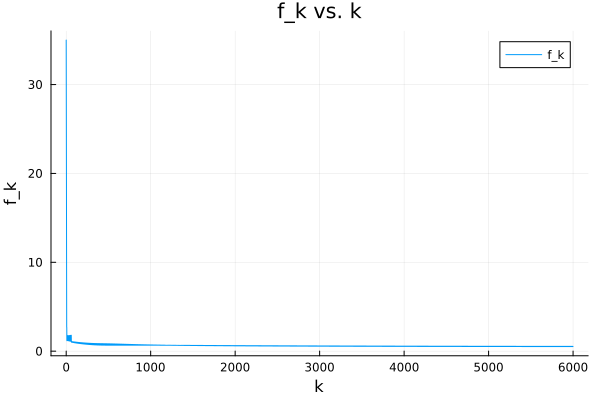

In [11]:
# part c
f_k_all = star[4]
k = range(0, E * N / B - 1)

Plots.plot(k, f_k_all, label = "f_k")
title!("f_k vs. k")
xlabel!("k")
ylabel!("f_k")

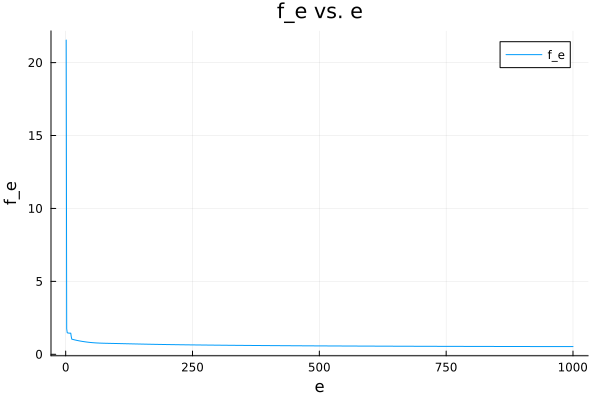

In [13]:
using Plots
e = range(1, E)
f_e_all = star[5]

Plots.plot(e, f_e_all, label = "f_e")
title!("f_e vs. e")
xlabel!("e")
ylabel!("f_e")

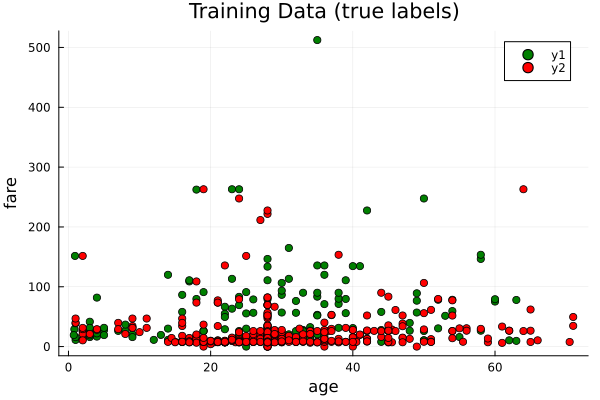

In [14]:
# training data points in the (age, fare)-space with their true labels

# empty variables so we can append the relevant data points to them
age_lived = zeros(0)
fare_lived = zeros(0)
age_died = zeros(0)
fare_died = zeros(0)

# simple check: if they are alive, put them in the alive set, else the dead set
for i = range(1, N)
    if survived[i] == 1
        append!(age_lived, age[i])
        append!(fare_lived, fare[i])
        
    else
        append!(age_died, age[i])
        append!(fare_died, fare[i])

    end

end

# plots age vs. fare; color is green if they are alive, red if they are dead
Plots.scatter(age_lived, fare_lived, color = "green")
Plots.scatter!(age_died, fare_died, color = "red")
title!("Training Data (true labels)")
xlabel!("age")
ylabel!("fare")

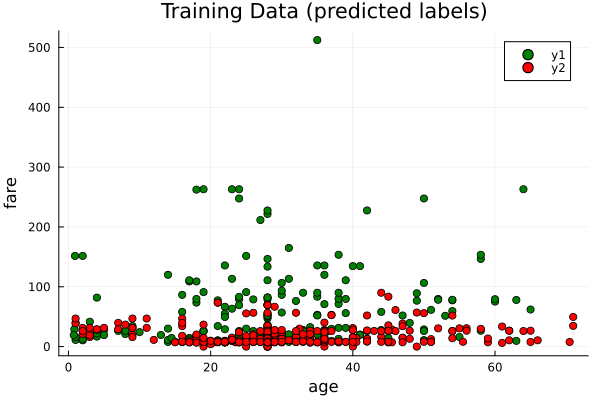

In [15]:
# training data points in the (age, fare)-space with their predicted labels

# definition of w
theta_0 = w_star[1]
theta = w_star[2: length(w_star)]

# empty variables so we can append the relevant data points to them
age_lived = zeros(0)
fare_lived = zeros(0)
age_died = zeros(0)
fare_died = zeros(0)

passenger_train = passenger[1: N]

# since alive is considered 1, then if the probability is >= 0.5, we can consider them alive
for i = passenger_train
    x = [age[i], fare[i], sex[i], sibsp[i], parch[i], pclass[i]]
    prob = 1 / (1 + exp(-(theta_0 + dot(theta, x))))

    if prob >= 0.5
        append!(age_lived, age[i])
        append!(fare_lived, fare[i])
    
    else
        append!(age_died, age[i])
        append!(fare_died, fare[i])

    end

end

# plots age vs. fare; color is green if they are alive, red if they are dead
Plots.scatter(age_lived, fare_lived, color = "green")
Plots.scatter!(age_died, fare_died, color = "red")
title!("Training Data (predicted labels)")
xlabel!("age")
ylabel!("fare")

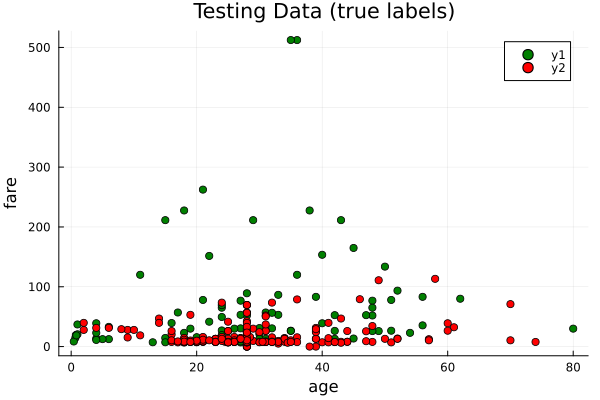

In [16]:
# testing data points in the (age, fare)-space with their true labels

# empty variables so we can append the relevant data points to them
age_lived = zeros(0)
fare_lived = zeros(0)
age_died = zeros(0)
fare_died = zeros(0)

# simple check: if they are alive, put them in the alive set, else the dead set
for i = range(N + 1, nrow(data))
    if survived[i] == 1
        append!(age_lived, age[i])
        append!(fare_lived, fare[i])
        
    else
        append!(age_died, age[i])
        append!(fare_died, fare[i])

    end

end

# plots age vs. fare; color is green if they are alive, red if they are dead
Plots.scatter(age_lived, fare_lived, color = "green")
Plots.scatter!(age_died, fare_died, color = "red")
title!("Testing Data (true labels)")
xlabel!("age")
ylabel!("fare")

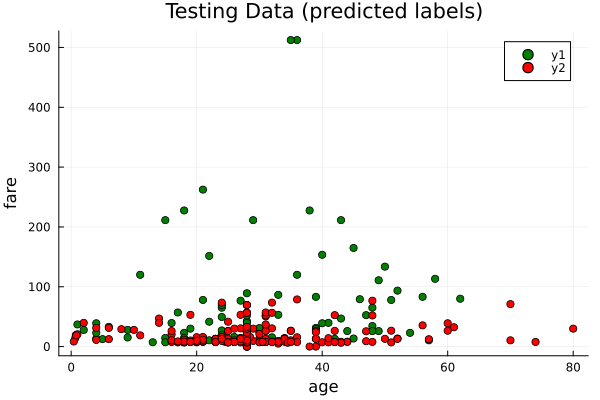

In [17]:
# testing data points in the (age, fare)-space with their predicted labels

# definition of w
theta_0 = w_star[1]
theta = w_star[2: length(w_star)]

# empty variables so we can append the relevant data points to them
age_lived = zeros(0)
fare_lived = zeros(0)
age_died = zeros(0)
fare_died = zeros(0)

passenger_test = data_test[!, 1]

# since alive is considered 1, then if the probability is >= 0.5, we can consider them alive
for i = passenger_test
    x = [age[i], fare[i], sex[i], sibsp[i], parch[i], pclass[i]]
    prob = 1 / (1 + exp(-(theta_0 + dot(theta, x))))

    if prob >= 0.5
        append!(age_lived, age[i])
        append!(fare_lived, fare[i])
    
    else
        append!(age_died, age[i])
        append!(fare_died, fare[i])

    end

end

# plots age vs. fare; color is green if they are alive, red if they are dead
Plots.scatter(age_lived, fare_lived, color = "green")
Plots.scatter!(age_died, fare_died, color = "red")
title!("Testing Data (predicted labels)")
xlabel!("age")
ylabel!("fare")

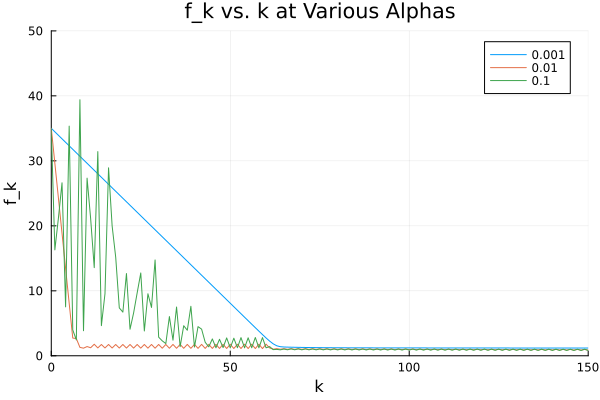

In [18]:
# part d

# for each run, we want a new plot
Plots.CURRENT_PLOT.nullableplot = nothing

# given alpha values
alpha_vec = [0.001, 0.01, 0.1]

# k defined before
k = range(0, E * N / B - 1)

for alpha_val in alpha_vec
    star = SGD(E, N, B, alpha_val, w_0, f_0)

    f_k_all = star[4]
    Plots.plot!(k, f_k_all, label = alpha_val, xlim = (0, 150), ylim = (0, 50))

end

title!("f_k vs. k at Various Alphas")
xlabel!("k")
ylabel!("f_k")

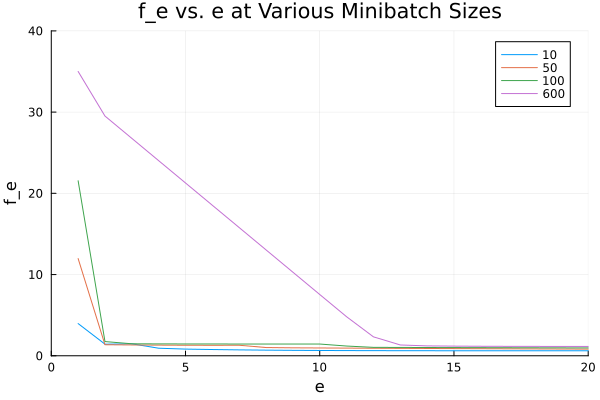

In [19]:
# part e

# for each run, we want a new plot
Plots.CURRENT_PLOT.nullableplot = nothing

# given B values
B_vec = [10, 50, 100, 600]

# e defined before
e = range(1, E)

for B_val in B_vec
    star = SGD(E, N, B_val, alpha, w_0, f_0)
    
    f_e_all = star[5]
    Plots.plot!(e, f_e_all, label = B_val, xlim = (0, 20), ylim = (0, 40))

end

title!("f_e vs. e at Various Minibatch Sizes")
xlabel!("e")
ylabel!("f_e")